[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyGenomeViz/blob/main/docs/examples/gallery_example.ipynb)

In [1]:
# Colab environment may require 'RESTART RUNTIME' to activate newly installed packages.
# %pip install pygenomeviz

## Escherichia phage

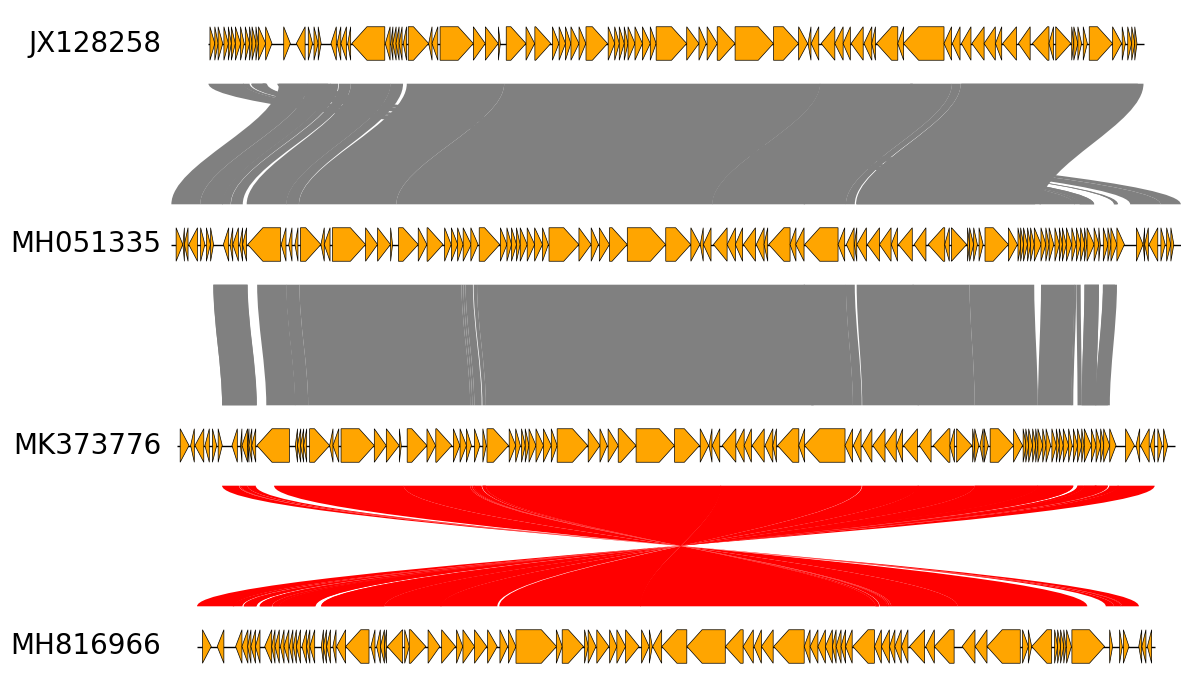

In [2]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    fig_width=12,
    feature_track_ratio=0.5,
    align_type="center",
)

gbk_files, links = load_dataset("escherichia_phage")
for gbk_file in gbk_files:
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.genome_length)
    track.add_genbank_features(gbk, size_ratio=0.5, arrow_shaft_ratio=1.0, linewidth=0.5)

for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, curve=True, alpha=1.0)

fig = gv.plotfig()

## Erwinia phage

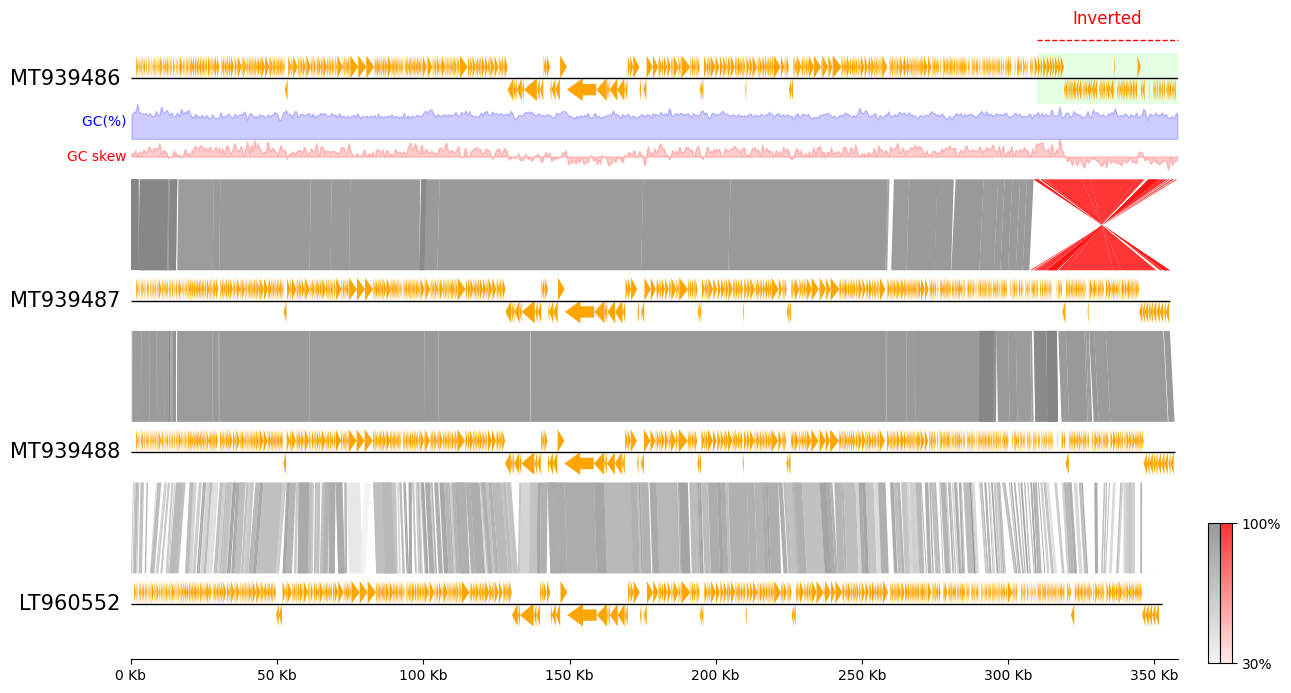

In [3]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    fig_width=12,
    fig_track_height=0.7,
    feature_track_ratio=0.5,
    tick_track_ratio=0.3,
    tick_style="axis",
    tick_labelsize=10,
)

gbk_files, links = load_dataset("erwinia_phage")
gbk_list = [Genbank(gbk_file) for gbk_file in gbk_files]
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.genome_length, labelsize=15)
    track.add_genbank_features(gbk, plotstyle="arrow")

min_identity = int(min(link.identity for link in links))
for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, v=link.identity, vmin=min_identity)

# Add subtracks to top track for plotting 'GC content' & 'GC skew'
gv.add_feature_subtrack(gv.top_track.name, "gc_content", ratio=0.7)
gv.add_feature_subtrack(gv.top_track.name, "gc_skew", ratio=0.7)

fig = gv.plotfig()

# Add label annotation to top track
top_track = gv.top_track  # or, gv.get_track("MT939486") or gv.get_tracks()[0]
label, start, end = "Inverted", 310000 + top_track.offset, 358000 + top_track.offset
center = int((start + end) / 2)
top_track.ax.hlines(1.5, start, end, colors="red", linewidth=1, linestyles="dashed", clip_on=False)
top_track.ax.text(center, 2.0, label, fontsize=12, color="red", ha="center", va="bottom")

# Add fillbox to top track
x, y = (start, start, end, end), (1, -1, -1, 1)
top_track.ax.fill(x, y, fc="lime", linewidth=0, alpha=0.1, zorder=-10)

# Plot GC content for top track
gc_content_ax = gv.top_track.subtracks[0].ax  # or, gv.get_track("gc_content").ax
pos_list, gc_content_list = gbk_list[0].calc_gc_content()
gc_content_ax.set_ylim(bottom=0, top=max(gc_content_list))
pos_list += gv.top_track.offset  # Offset is required if align_type is not 'left'
gc_content_ax.fill_between(pos_list, gc_content_list, alpha=0.2, color="blue")
gc_content_ax.text(gv.top_track.offset, max(gc_content_list) / 2, "GC(%) ", ha="right", va="center", color="blue")

# Plot GC skew for top track
gc_skew_ax = gv.top_track.subtracks[1].ax  # or, gv.get_track("gc_skew").ax
pos_list, gc_skew_list = gbk_list[0].calc_gc_skew()
gc_skew_abs_max = max(abs(gc_skew_list))
gc_skew_ax.set_ylim(bottom=-gc_skew_abs_max, top=gc_skew_abs_max)
pos_list += gv.top_track.offset  # Offset is required if align_type is not 'left'
gc_skew_ax.fill_between(pos_list, gc_skew_list, alpha=0.2, color="red")
gc_skew_ax.text(gv.top_track.offset, 0, "GC skew ", ha="right", va="center", color="red")

# Set coloarbar for link
gv.set_colorbar(fig, vmin=min_identity)

## Enterobacteria phage

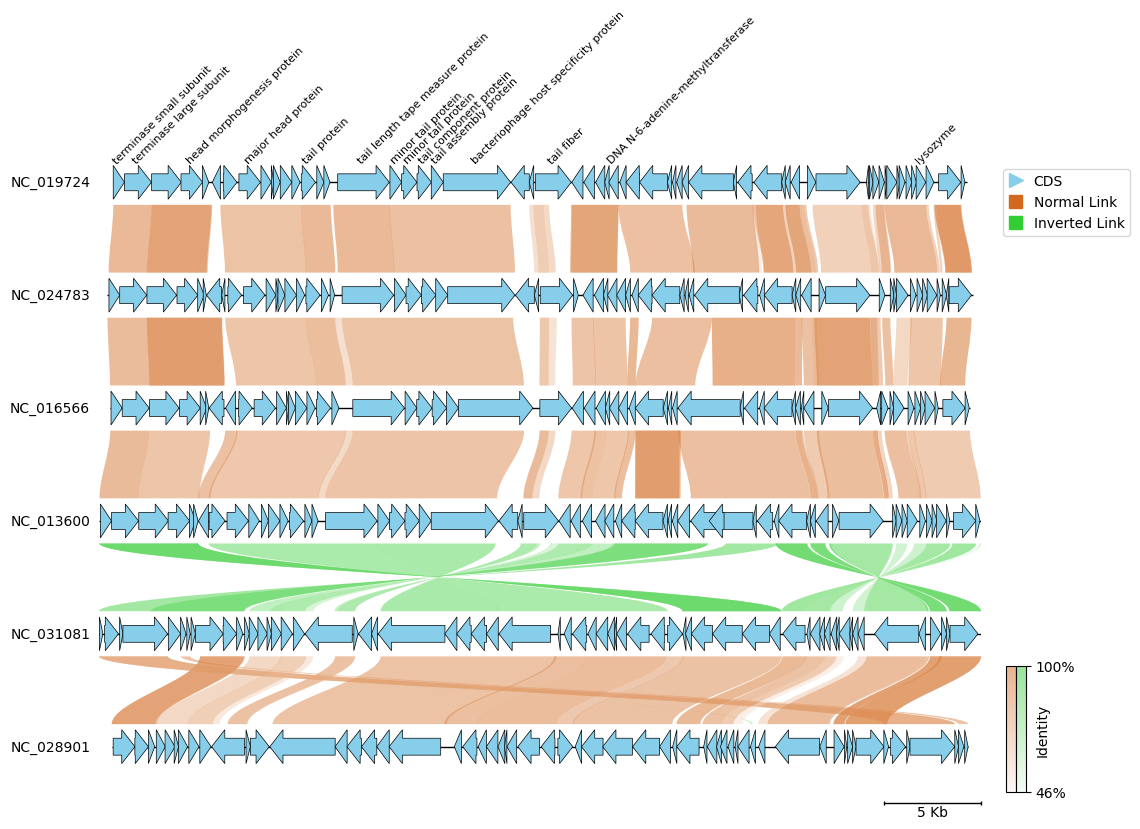

In [4]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    fig_width=10,
    fig_track_height=0.7,
    feature_track_ratio=0.5,
    tick_track_ratio=0.5,
    align_type="center",
    tick_style="bar",
    tick_labelsize=10,
)

gbk_files, links = load_dataset("enterobacteria_phage")
for idx, gbk_file in enumerate(gbk_files):
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.genome_length, labelsize=10)
    track.add_genbank_features(
        gbk,
        label_type="product" if idx == 0 else None,  # Labeling only top track
        label_filter=["hypothetical"],  # Ignore 'hypothetical ~~~' label
        labelsize=8,
        labelvpos="top",
        facecolor="skyblue",
        linewidth=0.5,
    )

normal_color, inverted_color, alpha = "chocolate", "limegreen", 0.5
min_identity = int(min(link.identity for link in links))
for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, normal_color, inverted_color, alpha, v=link.identity, vmin=min_identity, curve=True)

fig = gv.plotfig()

# Add Legends (Maybe there is a better way)
handles = [
    Line2D([], [], marker=">", color="skyblue", label="CDS", ms=10, ls="none"),
    Patch(color=normal_color, label="Normal Link"),
    Patch(color=inverted_color, label="Inverted Link"),
]
fig.legend(handles=handles, frameon=True, bbox_to_anchor=(1, 0.8), loc="upper left", ncol=1, handlelength=1, handleheight=1)

# Set colorbar for link
gv.set_colorbar(fig, bar_colors=[normal_color, inverted_color], alpha=alpha, vmin=min_identity, bar_height=0.15, bar_label="Identity", bar_labelsize=10)

## Escherichia coli

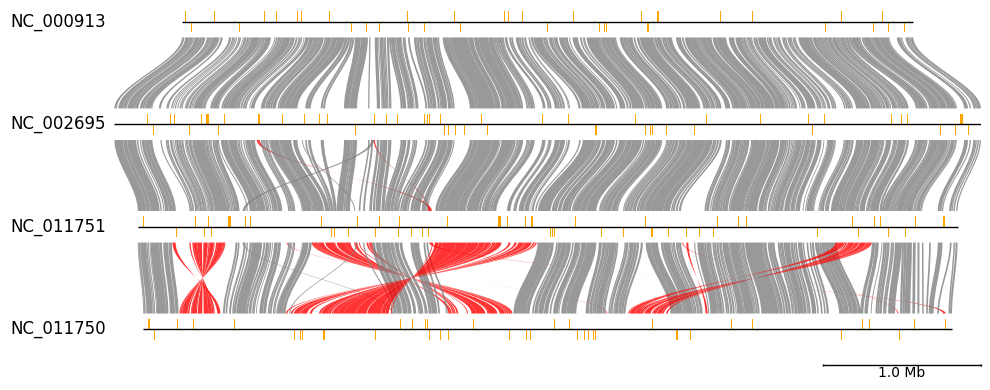

In [5]:

gv = GenomeViz(
    fig_width=10,
    fig_track_height=0.5,
    feature_track_ratio=0.3,
    tick_track_ratio=0.3,
    align_type="center",
    tick_style="bar",
    tick_labelsize=10,
    # Lowerling 'plot_size_thr' will display more features on track
    # This parameter is used for reducing rendering time of large genome dataset
    # In most cases, displaying all features in large genome will result in bad figure
    plot_size_thr=0.0005,
)

gbk_files, links = load_dataset("escherichia_coli")
for gbk_file in gbk_files:
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.genome_length, labelsize=12)
    track.add_genbank_features(gbk, plotstyle="box")

for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, curve=True)

fig = gv.plotfig()